# Agricultural Emissions Regression Project


<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Regression Models](#chapter6)
* <b>[7. Conclusion](#chapter7)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [23]:
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)

In [24]:
df.info()
pd.set_option("display.max_columns", None)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

In [ ]:
# missing values
# df.isnull().sum()

# duplicated rows - none
# df.duplicated().sum()

0

In [25]:
def check_for_conditional_values(df, condition, value):
    '''
    Display the number of values in each column that matches the provided condition and value.
    Used to identify columns that contain unexpected values e.g. -1 values where the value should be nan
    e.g check_for_conditional_values(df, "==", -1 ) will print number of records containing "-1"

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicate rows.
    condition:  The condition or operator to be used "<", "<=", "==", ">=", or ">" are valid
    value: The value to be used with the condition. Any integer can be used.

    Returns:
    No return value. The count of values matching the expression per column is printed to the screen.
    "e.g
    '''
    print(f"Checking columns with values {condition} {value}")
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            if condition == "<":
                matching_values = df[col] < value
            elif condition == "<=":
                matching_values = df[col] <= value
            elif condition == "==":
                matching_values = df[col] == value
            elif condition == ">=":
                matching_values = df[col] >= value
            elif condition == ">":
                matching_values = df[col] > value
            else:
                print("Invalid conditional operator specified")
                return
            # print(matching_values)
            count_matches = matching_values.sum()

            if count_matches > 0:
                print(f"{col} has {count_matches} values matching condition {condition} {value}")
            else:
                pass

In [ ]:
# looking for negative values, nan, -1, 0 values

# check_for_conditional_values(df, "<", 0)
# check_for_conditional_values(df, "==", -1)
# check_for_conditional_values(df, "==", 0)

Checking columns with values == -1


## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In [21]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,6492.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.222000e+03,6037.000000,6965.000000,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,25789.143619,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.114209e+05,3226.992039,9103.556202,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,11.399950,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,3.903153e+01,16.303000,139.669900,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,155.471100,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,8.037066e+02,120.443900,972.567400,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,1377.151950,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,6.155175e+03,460.120200,2430.792600,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


### **Histogram:**
We'll plot histograms to visualize the distribution of key variables, particularly CO2 emissions.

C:\Users\Shireen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


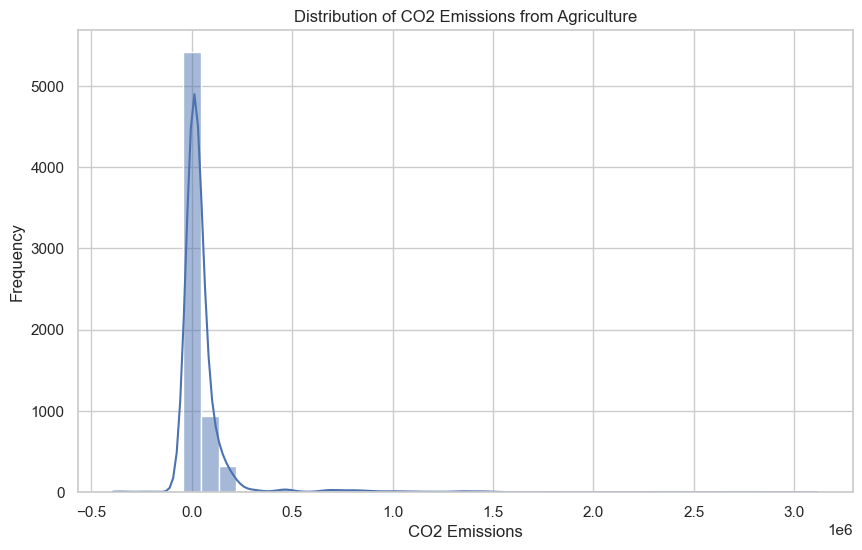

In [33]:
# Histogram of CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(df['total_emission'], bins=40, kde=True)
plt.title('Distribution of CO2 Emissions from Agriculture')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

**Distribution of CO2 Emissions**:

The histogram indicates that CO2 emissions are right-skewed, with a majority of the values clustered at lower emissions, suggesting that a few countries or regions may contribute disproportionately to emissions.

### **Correlation:**
How different variables correlate with each other, we can create a heatmap

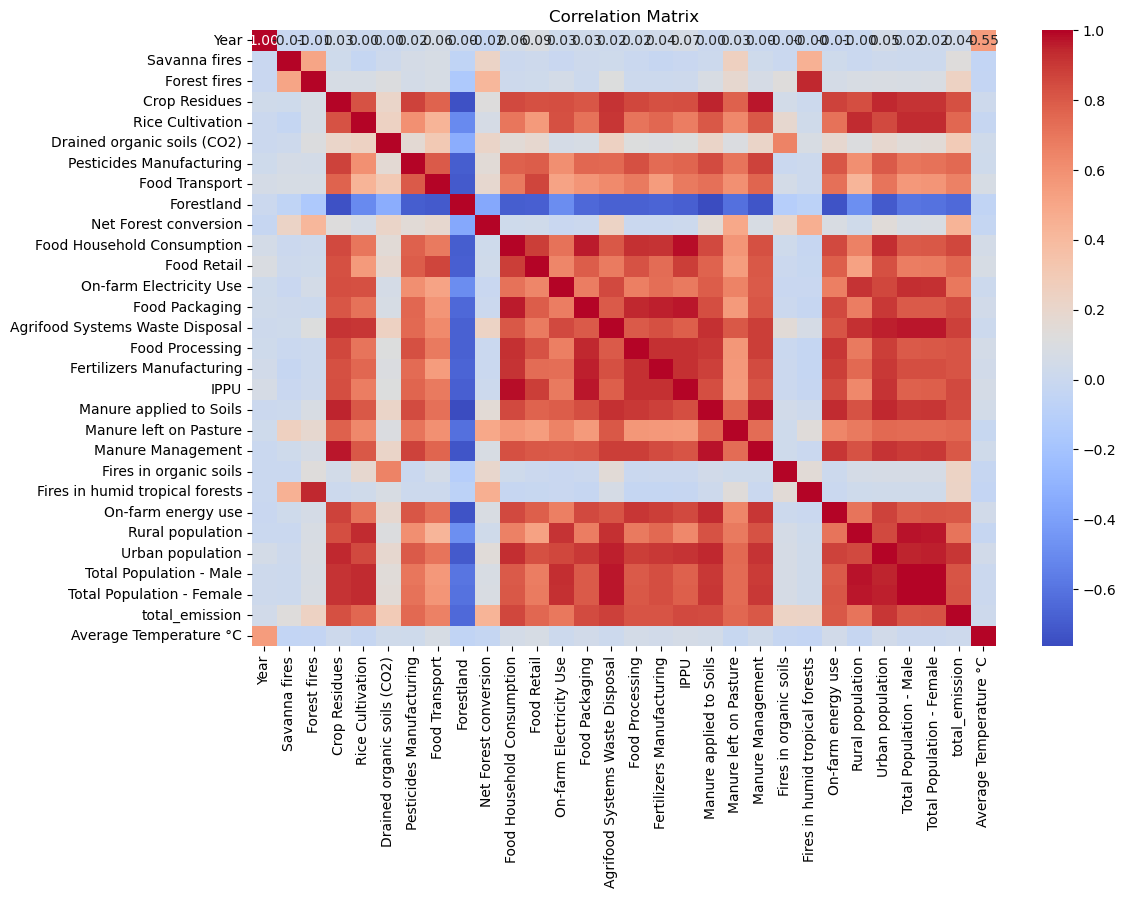

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
df_float = df_float.select_dtypes(exclude='object')
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Correlation Analysis:**

Certain variables may have strong correlations with CO2 emissions. For example, if variables such as agricultural production or land use are positively correlated, it implies that as agricultural activity increases, CO2 emissions may also rise.
Look for any negative correlations that might indicate effective practices reducing emissions.

### **Line Plot of Average:**
Analyze average CO2 emissions per year, we need to group the data by year and calculate the mean.

C:\Users\Shireen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shireen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


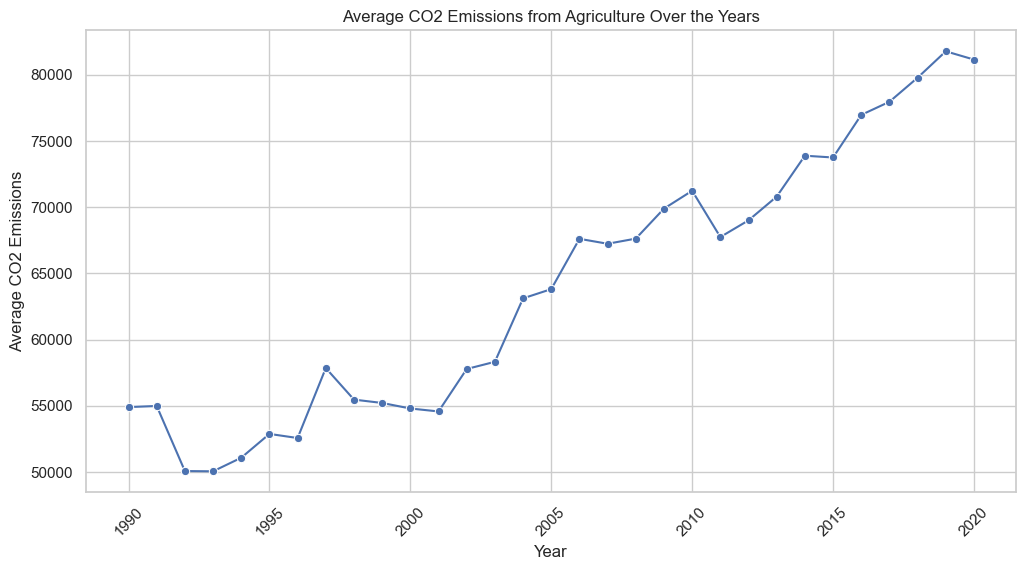

In [14]:
average_emissions_per_year = df.groupby('Year')['total_emission'].mean().reset_index()

# Set the style of seaborn
sns.set(style='whitegrid')

# Line plot of average CO2 emissions
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_emissions_per_year, x='Year', y='total_emission', marker='o')
plt.title('Average CO2 Emissions from Agriculture Over the Years')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
plt.xticks(rotation=45)
plt.show()


**Trend Analysis:**

The line plot allows us to observe the trend of CO2 emissions over time. Look for patterns such as consistent increases, decreases, or any significant spikes in certain years.

**Yearly Variations:**

If certain years show substantial increases or decreases in average emissions, these may correlate with global events (e.g., economic downturns, policy changes, or technological advancements).

### **Line Plot 2:**
Total CO2 emissions over the years for each area using a line graph.

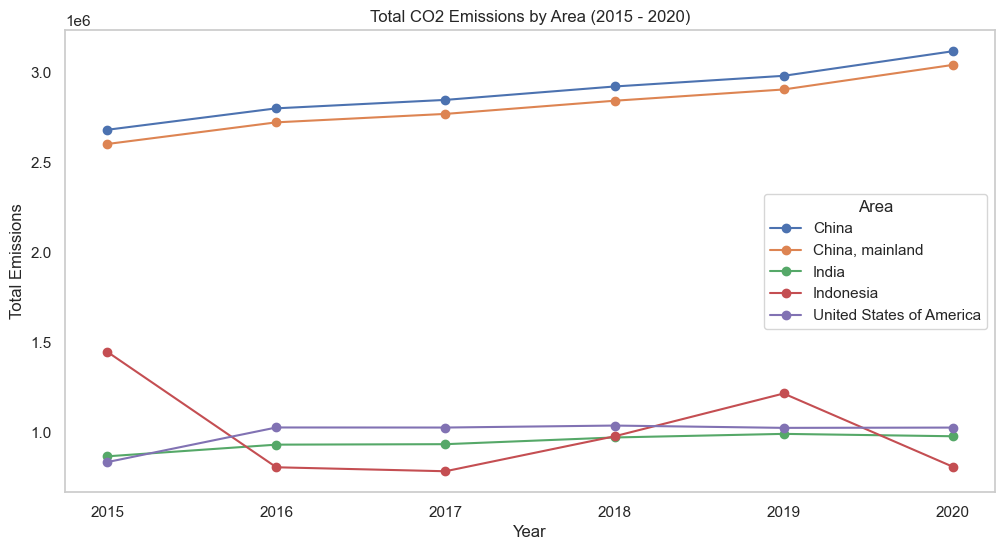

In [29]:
# Filter for the years 2015 to 2020
df_filtered = df[df['Year'].between(2015, 2020)]

# Group by Area and Year, summing the emissions
total_emissions = df_filtered.groupby(['Area', 'Year'])['total_emission'].sum().reset_index()

# Identify the top 5 countries based on total emissions over the period
top_5_countries = total_emissions.groupby('Area')['total_emission'].sum().nlargest(5).index

# Filter the dataset to include only the top 5 countries
top_5_emissions = total_emissions[total_emissions['Area'].isin(top_5_countries)]

# Create the line graph
plt.figure(figsize=(12, 6))
for area in top_5_emissions['Area'].unique():
    subset = top_5_emissions[top_5_emissions['Area'] == area]
    plt.plot(subset['Year'], subset['total_emission'], marker='o', label=area)

# Add titles and labels
plt.title('Total CO2 Emissions by Area (2015 - 2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(total_emissions['Year'].unique())  # Ensure all years are shown
plt.legend(title='Area')
plt.grid()
plt.show()

**Trends in Emissions:**

If one or more countries show a consistent increase in emissions, it may suggest growing agricultural activities or inefficiencies in emission reductions.Where as a decline in emissions could indicate successful policy implementations, improved agricultural practices, or a shift towards sustainable practices.

## 6. Regression Models <a class="anchor" id="chapter6"></a>

## 7. Conclusion <a class="anchor" id="chapter7"></a>